# Profit Projections using Monte Carlo Simulation

A Monte Carlo simulation replaces a fixed model parameter with a random variable from a probability distribution (the normal distribution is a good baseline). Including this uncertainty in the model enables us to measure the uncertainty or risk in the output.

The aim of this project is to use a Monte Carlo simulation to forecast future profits for a generalized business. The model output will be a distribution of profit projections, along with a 95% confidence interval.


In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Single Variable

We'll start by looking at profit projections for a particular product. Let's collect the expenses, unit pricing, sales forecast from last year's data, and the standard deviation in sales from annual historical data.


In [40]:
# $ units
expenses_fixed = 50000
expenses_variable = 45
unit_price = 140

# number of units
sales_forecast = 590
sales_std = 68

Next let's run the Monte Carlo simulation. We'll assume a normal distribution for number of sales.


In [41]:
samples = 10000
sales = np.random.default_rng(seed=42).normal(
    sales_forecast, sales_std, samples)
profit = sales * unit_price - expenses_fixed - expenses_variable * sales

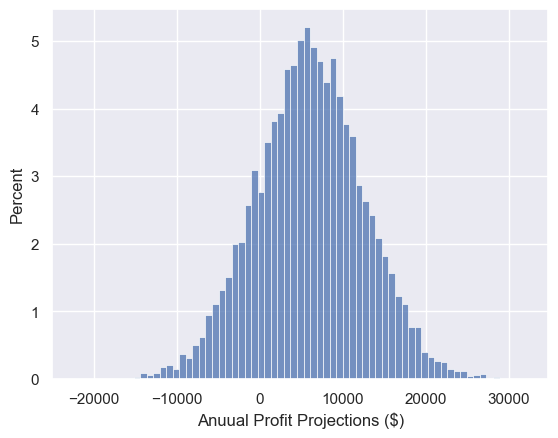

In [42]:
# sns.histplot(data=sales, stat='percent')
# plt.xlabel('Anuual Sales Projections ($)')
# plt.show()

sns.histplot(data=profit, stat='percent')
plt.xlabel('Anuual Profit Projections ($)')
plt.show()

Now we'll build a 95% confidence interval around the model output.


In [43]:
mean = np.mean(profit)
std = np.std(profit)

# 95% confidence interval
min_profit = mean - 2 * std
max_profit = mean + 2 * std

print('95% Confidence Interval Projections (in $)')
print(f'Min profit: {min_profit:.0f}')
print(f'Max profit: {max_profit:.0f}')

95% Confidence Interval Projections (in $)
Min profit: -7017
Max profit: 18985


Let's visualize the 95% confidence interval on the projected profits distribution.


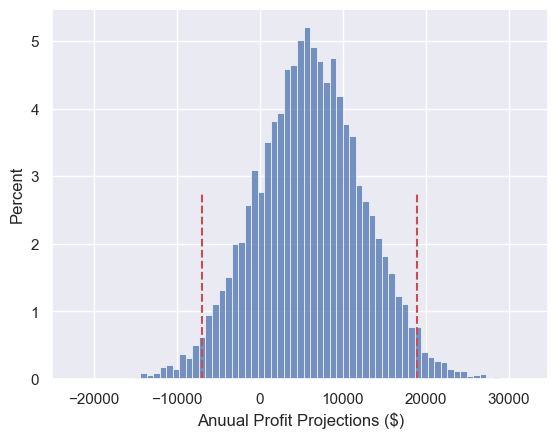

In [44]:
sns.histplot(data=profit, stat='percent')
plt.xlabel('Anuual Profit Projections ($)')
plt.axvline(min_profit, 0, 0.5, c='r', linestyle='--')
plt.axvline(max_profit, 0, 0.5, c='r', linestyle='--')
plt.show()

The computed confidence interval tells us that we can be 95% confident that the true projected profits will be between -`$7,017` and `$18,985`. Given the potential for negative profits (losses), the model captures the level of moderate risk associated with this product's projected profits.


## Multiple Variables

Let's try a slighly more complicated example where we forecast projected annual profits for a portfolio of products. This involves modeling sales for multiple products as random variables from multiple probability distributions.


In [61]:
# $ units
expenses_fixed = 50000
expenses_variable = [45, 50, 22]
unit_price = [140, 100, 60]

# number of units
sales_forecast = [590, 310, 620]
sales_std = [68, 30, 82]

Next we'll run the Monte Carlo simulation, assuming a normal distribution for sales of each product.


In [74]:
samples = 10000

sales = []
for forecast, std in zip(sales_forecast, sales_std):
    sales.append(np.random.default_rng(seed=42).normal(
        forecast, std, samples))

profit = np.full(samples, -expenses_fixed, dtype=float)
for i in range(len(sales)):
    profit += (sales[i] * unit_price[i] - expenses_variable[i] * sales[i])

We'll also compute a naive profit project for comparison by only using the sales forecast numbers for each product, neglecting the standard deviations and any probability distributions associated with the sales numbers.


In [75]:
naive_profit = -expenses_fixed
for i in range(len(sales_forecast)):
    naive_profit += (sales_forecast[i] * unit_price[i] -
                     expenses_variable[i] * sales_forecast[i])

print(f'Naive Profit Projection (without Monte Carlo Method): {naive_profit}')

Naive Profit Projection (without Monte Carlo Method): 45110


95% Confidence Interval Projections (in $)
Min profit: 22705
Max profit: 67288


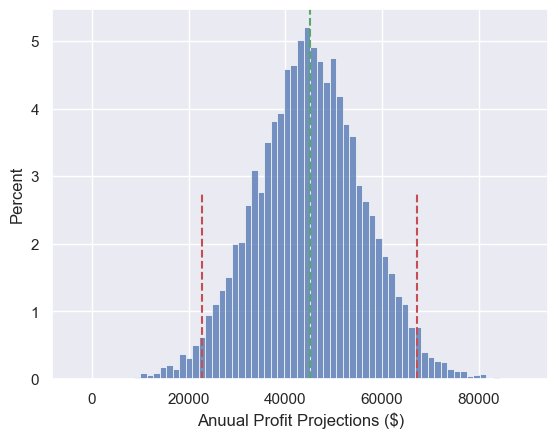

In [76]:
mean = np.mean(profit)
std = np.std(profit)

# 95% confidence interval
min_profit = mean - 2 * std
max_profit = mean + 2 * std

print('95% Confidence Interval Projections (in $)')
print(f'Min profit: {min_profit:.0f}')
print(f'Max profit: {max_profit:.0f}')

sns.histplot(data=profit, stat='percent')
plt.xlabel('Anuual Profit Projections ($)')
plt.axvline(min_profit, 0, 0.5, c='r', linestyle='--')
plt.axvline(max_profit, 0, 0.5, c='r', linestyle='--')
plt.axvline(naive_profit, 0, 1, c='g', linestyle='--')
plt.show()

The computed confidence interval tells us that we can be 95% confident that the true projected profits will be between `$`22,705 and `$`67,288, which captures the level of uncertainty or risk associated with the profit projections. For comparison, the naive profit projection (by neglecting standard deviations in sales) is shown as the green dotted line in the histogram above. As expected, the distribution is centered around this value.
